In [19]:
import sklearn 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("Data/AMZN.csv", usecols = ["Date", "Close"])
df.head()

,Date,Close
0,2020-09-08,157.492004
1,2020-09-09,163.430496
2,2020-09-10,158.755493
3,2020-09-11,155.811005
4,2020-09-14,155.148499


<Axes: xlabel='Date', ylabel='Close'>

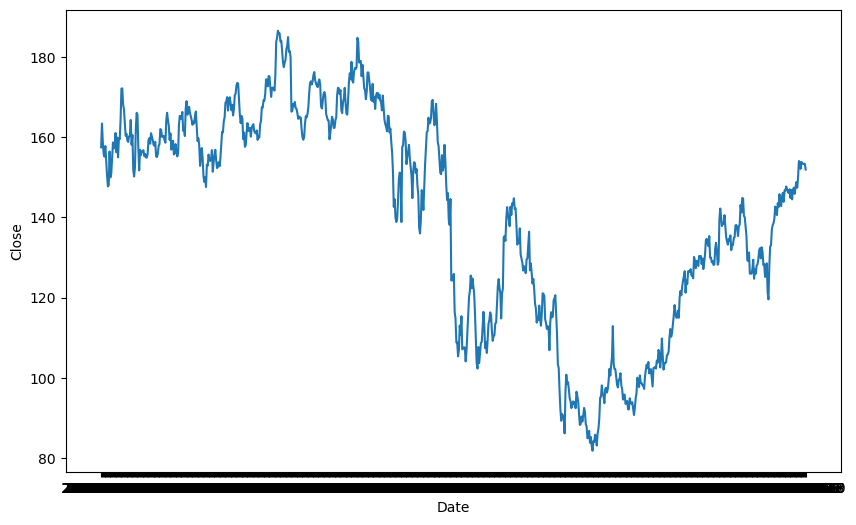

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Date", y="Close", data=df)

In [22]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
    Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ---------
    timesteps : array of timesteps
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (setting a value will index from end of timesteps & values)
    label : label to show on plot of values
    """
    # Plot the series

    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("AMZN Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

In [23]:
dates = df["Date"]
close = df["Close"]

split_size = round(len(dates) * 0.8)

train_dates, train_close = dates[:split_size], close[:split_size]
test_dates, test_close = dates[split_size:], close[split_size:]

In [24]:
naive_forecast = test_close[:-1]

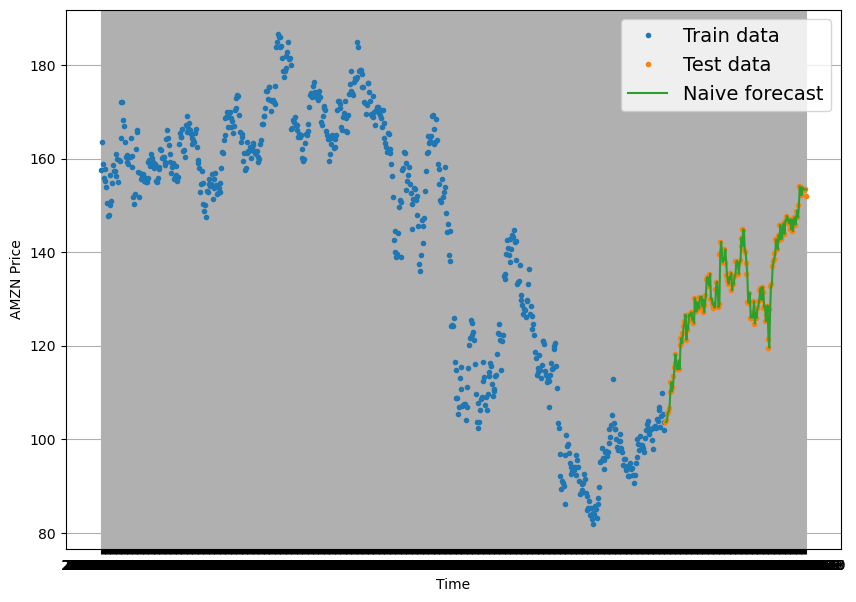

In [25]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=train_dates, values=train_close, label="Train data")
plot_time_series(timesteps=test_dates, values=test_close, label="Test data")
plot_time_series(timesteps=test_dates[1:], values=naive_forecast, format="-", label="Naive forecast");

# Drift Method

In [27]:
df["shifted_column"] = df["Close"].shift()
df["difference"] = df['Close'] - df["shifted_column"] 
df['difference'] = df['difference'].abs()
df["difference"].abs()
average_roc = df['difference'].mean()

In [28]:
drift_forecast = test_close[:-1] + average_roc

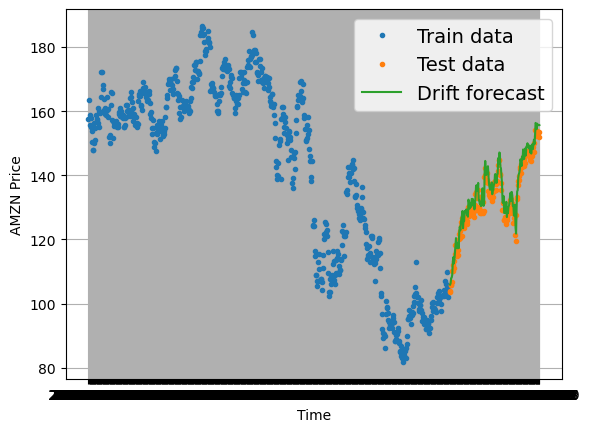

In [30]:
plot_time_series(timesteps=train_dates, values=train_close, label="Train data")
plot_time_series(timesteps=test_dates, values=test_close, label="Test data")
plot_time_series(timesteps=test_dates[1:], values=drift_forecast, format="-", label="Drift forecast");